In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# informs matplotlib to render the plots directly below the code cells
import seaborn as sns

In [3]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')
# to avoid encoding error use 'unicode_escape'

# DATA CLEANING

In [5]:
df.shape

(11251, 15)

In [7]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
# drop unrelated/blank columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [13]:
# check for null values and remove them
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
df.dropna(inplace=True)

In [17]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [21]:
# check for duplicate values and remove them
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11246    False
11247    False
11248    False
11249    False
11250    False
Length: 11239, dtype: bool

In [23]:
# change the data type of column Amount
df["Amount"]= df["Amount"].astype("int")

In [25]:
df["Amount"].dtype

dtype('int32')

In [31]:
# get the statistical information of column - Age,Orders,Amount
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

# Gender

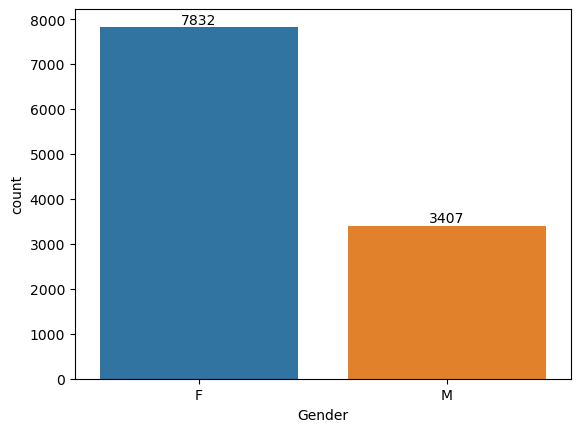

In [56]:
ax=sns.countplot(x="Gender",data=df,hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

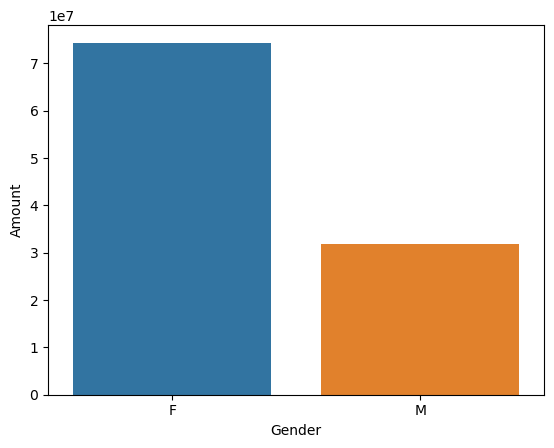

In [58]:
sale_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=sale_gen,hue="Gender")
plt.show()

From the above graphs we can see that most of the buyers are female and even the purchasing power of females is greater the men

# Age

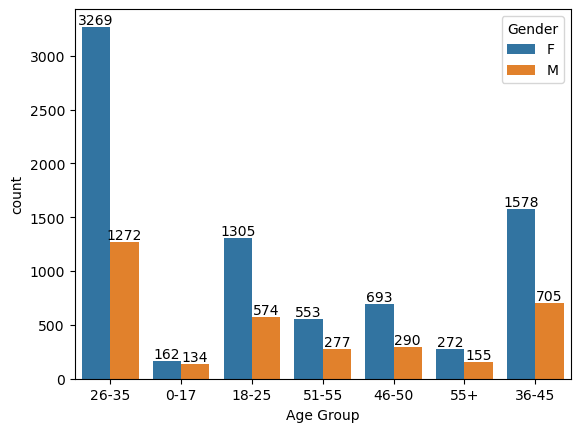

In [76]:
bx=sns.countplot(x="Age Group",data=df,hue="Gender")
for bars in bx.containers:
    bx.bar_label(bars)
plt.show()

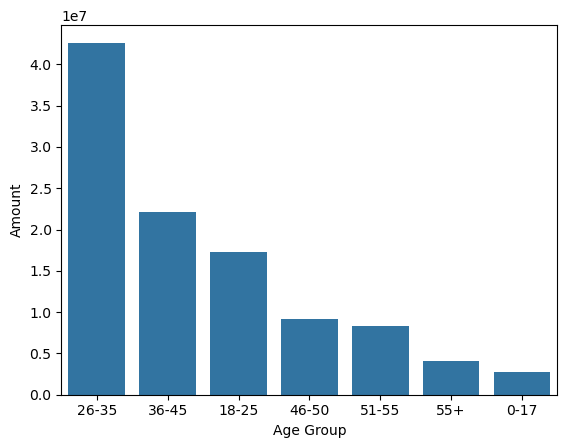

In [85]:
sale_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=sale_age)
plt.show()

From the above graphs we can see that the most buyers are from age group 26-35 female

# State

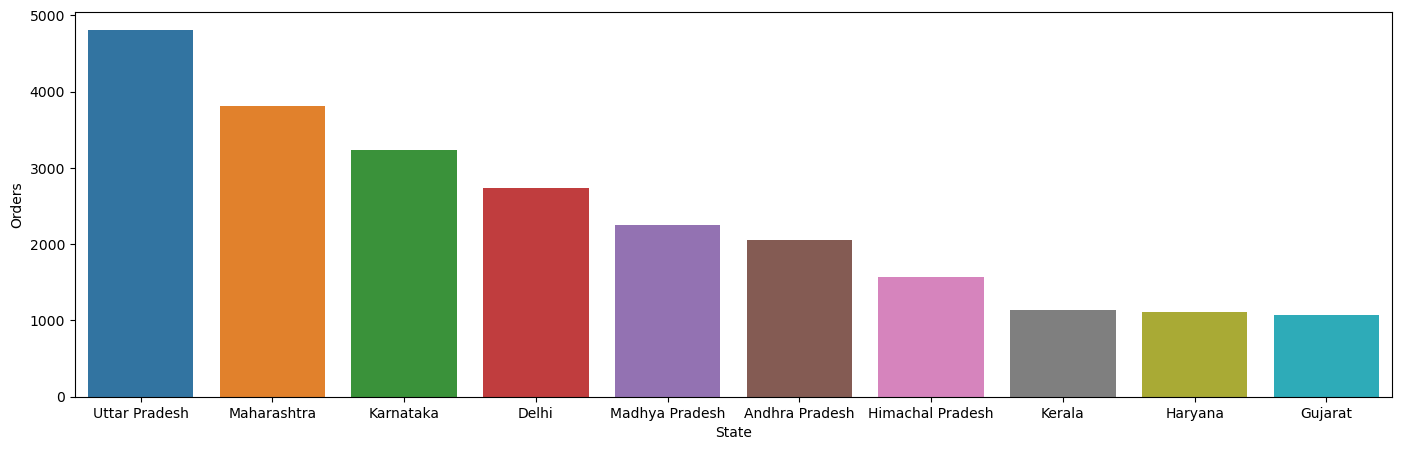

In [112]:
# total number of orders from top 10 state
ord = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
plt.figure(figsize=(17,5))
sns.barplot(x="State",y="Orders",data=ord,hue="State")
plt.show()

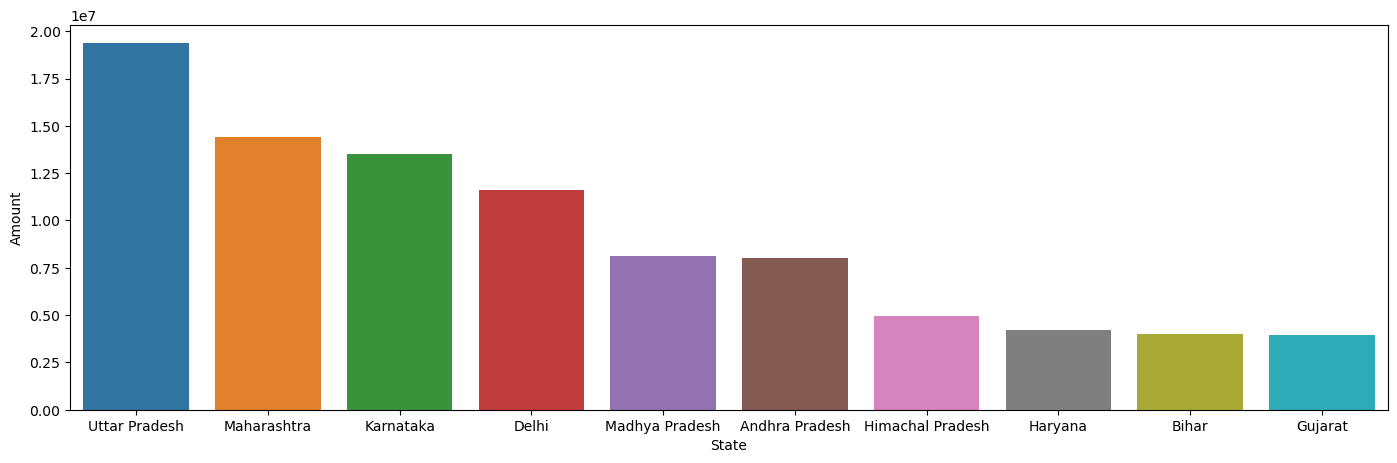

In [114]:
# total sales from top 10 states
sale_state = df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
plt.figure(figsize=(17,5))
sns.barplot(x="State",y="Amount",data=sale_state,hue="State")
plt.show()

From the above graphs we can see that most orders and sales are from Uttar Pradesh, Maharashtra and Karnatka 

# Marital Status

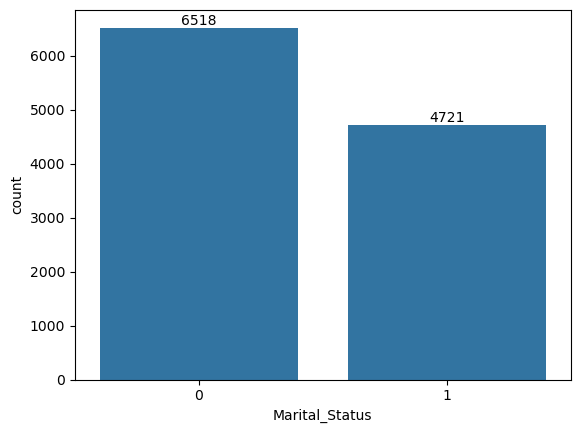

In [168]:
cx= sns.countplot(x="Marital_Status",data=df)
for bars in cx.containers:
    cx.bar_label(bars)
plt.show()

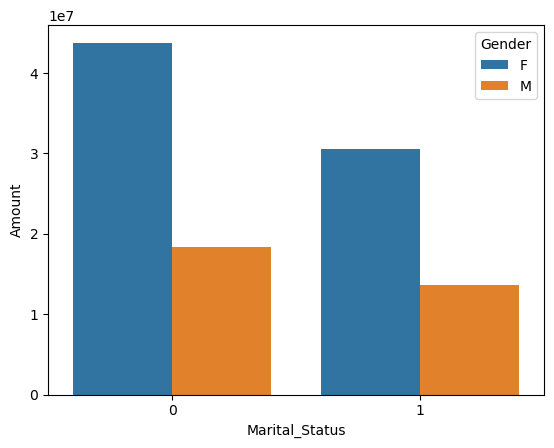

In [170]:
sale_marital=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Marital_Status",y="Amount",data=sale_marital,hue="Gender")
plt.show()

From the above graphs it is obtained the most buyers are married females

# Occupation

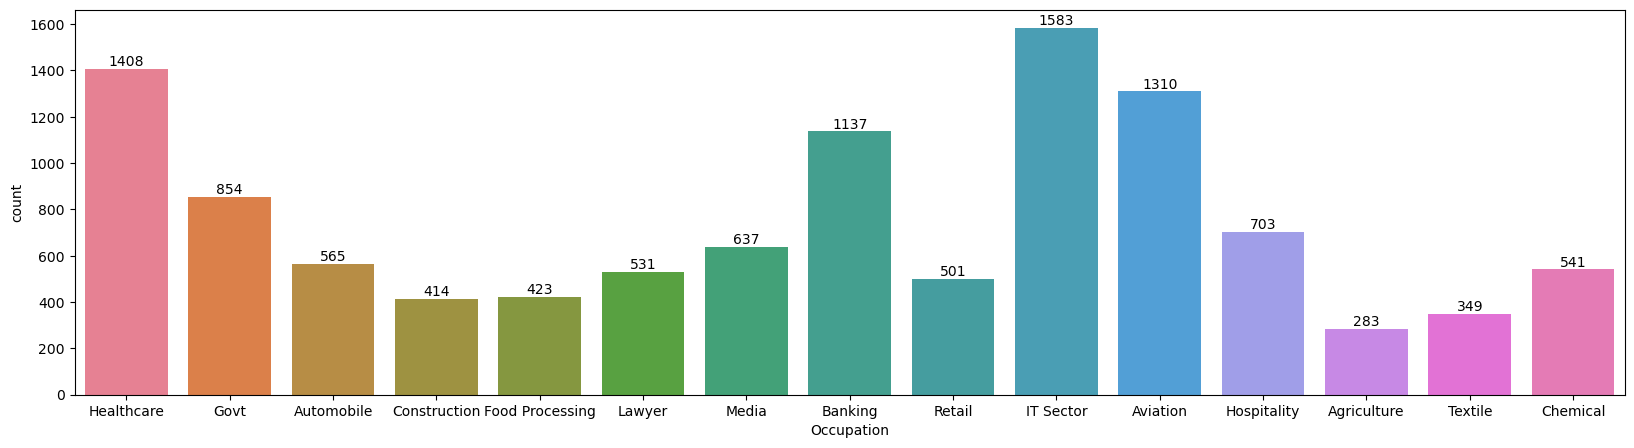

In [162]:
plt.figure(figsize=(20,5))
ex=sns.countplot(x="Occupation",data=df,hue="Occupation")
for bars in ex.containers:
    ex.bar_label(bars)
plt.show()

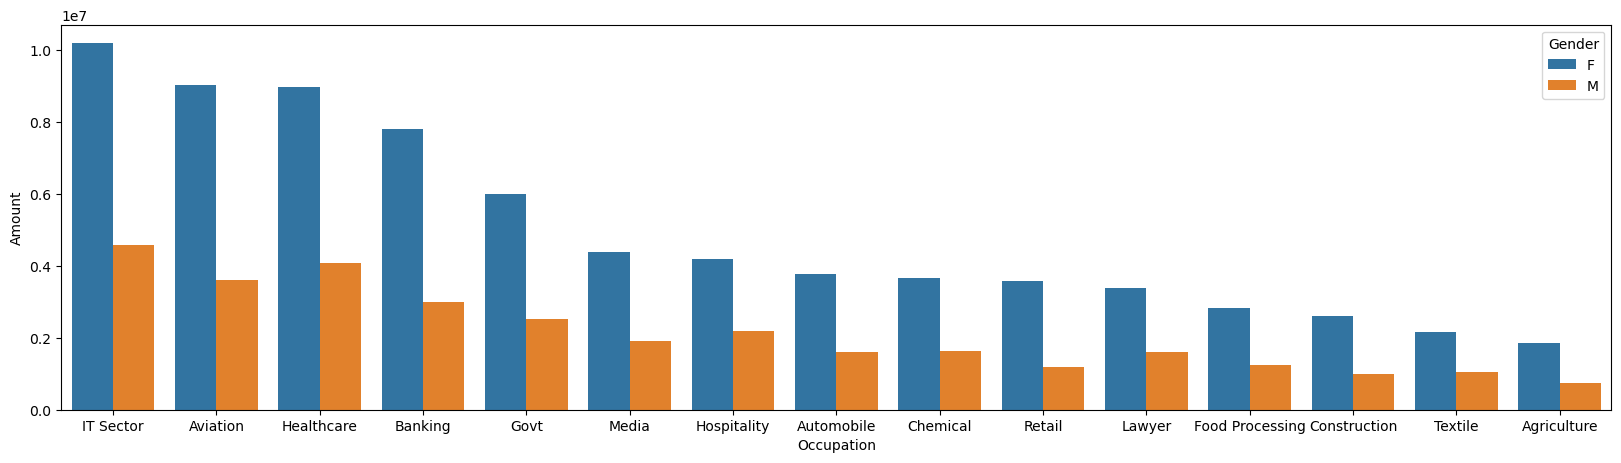

In [166]:
plt.figure(figsize=(20,5))
sale_occ=df.groupby(["Occupation","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Occupation",y="Amount",data=sale_occ,hue="Gender")
plt.show()

From the above graph we see that most buyers are females from IT sector followed by Aviation and Healthcare sector

# Product Category

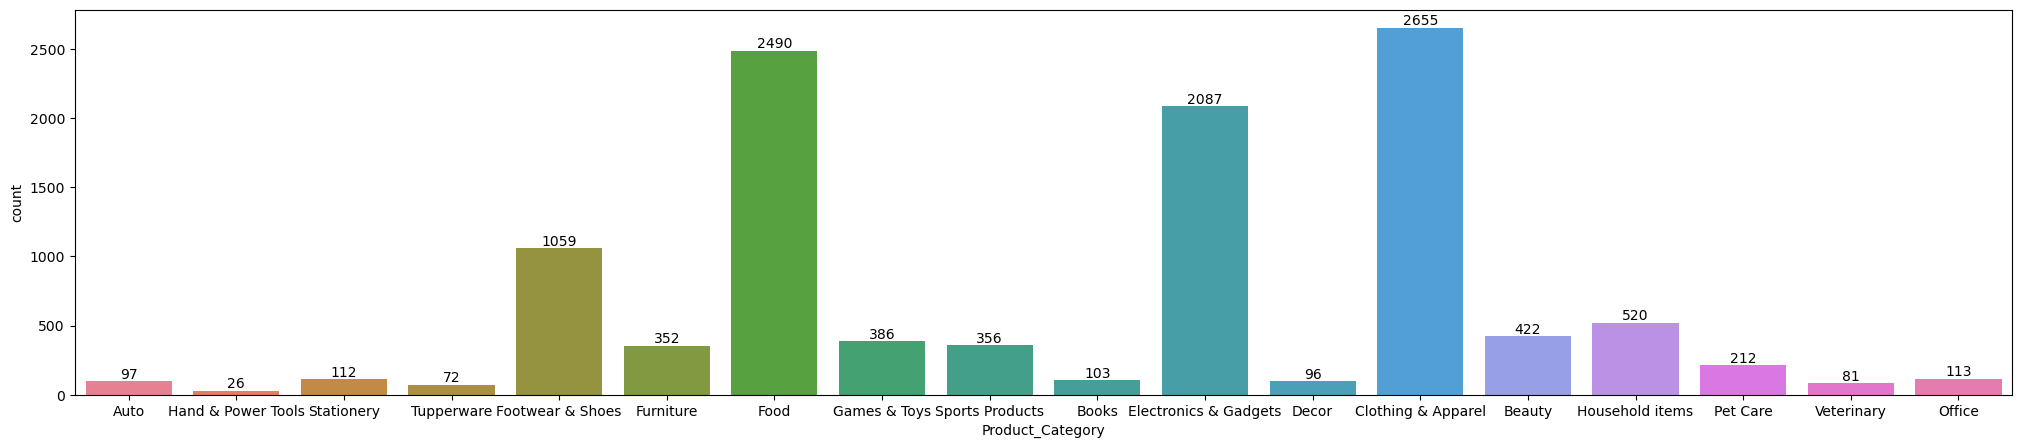

In [182]:
plt.figure(figsize=(25,5))
fx=sns.countplot(x="Product_Category",data=df,hue="Product_Category")
for bars in fx.containers:
    fx.bar_label(bars)
plt.show()

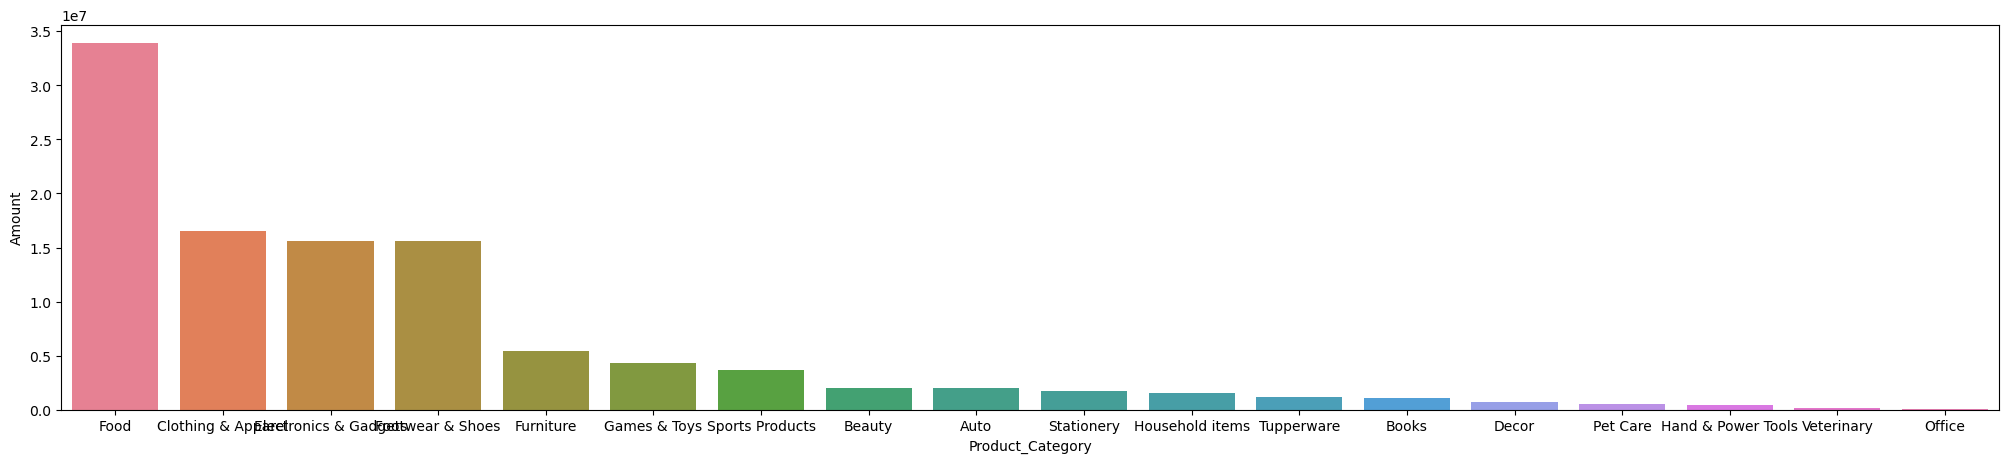

In [218]:
plt.figure(figsize=(25,5))
sale_product=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Product_Category",y="Amount",data=sale_product,hue="Product_Category")
plt.show()

We can see that the most products sold are Food, Clothing and Electronics

# top 10 most ordered items

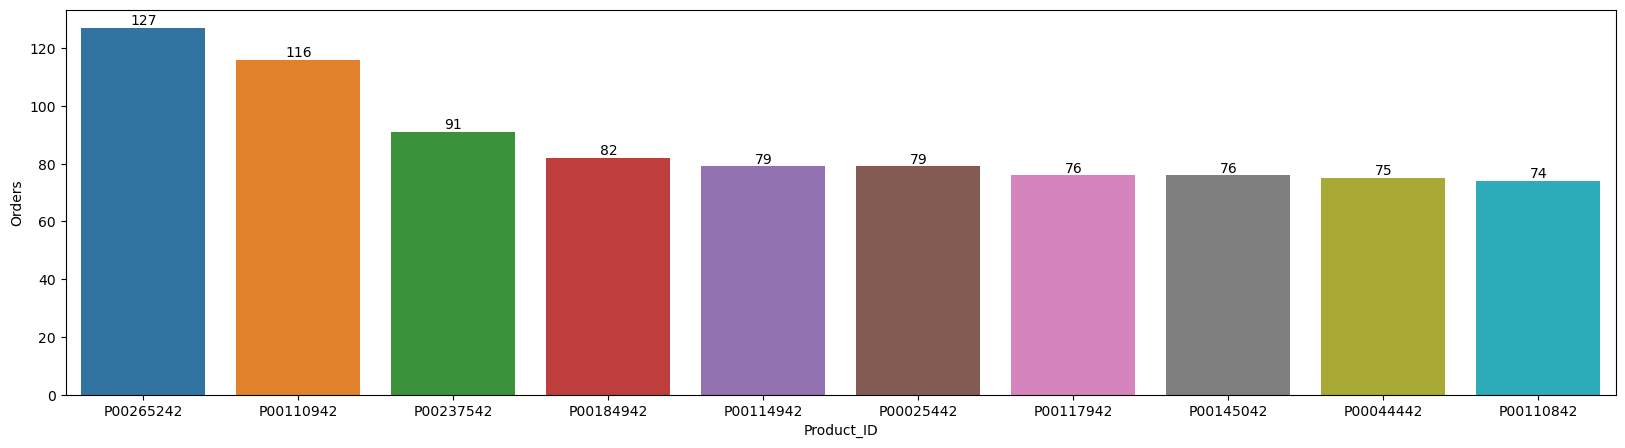

In [229]:
plt.figure(figsize=(20,5))
sale=df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
a=sns.barplot(x="Product_ID",y="Orders",data=sale,hue="Product_ID")
for bars in a.containers:
    a.bar_label(bars)
plt.show()

# top 10 most sold items

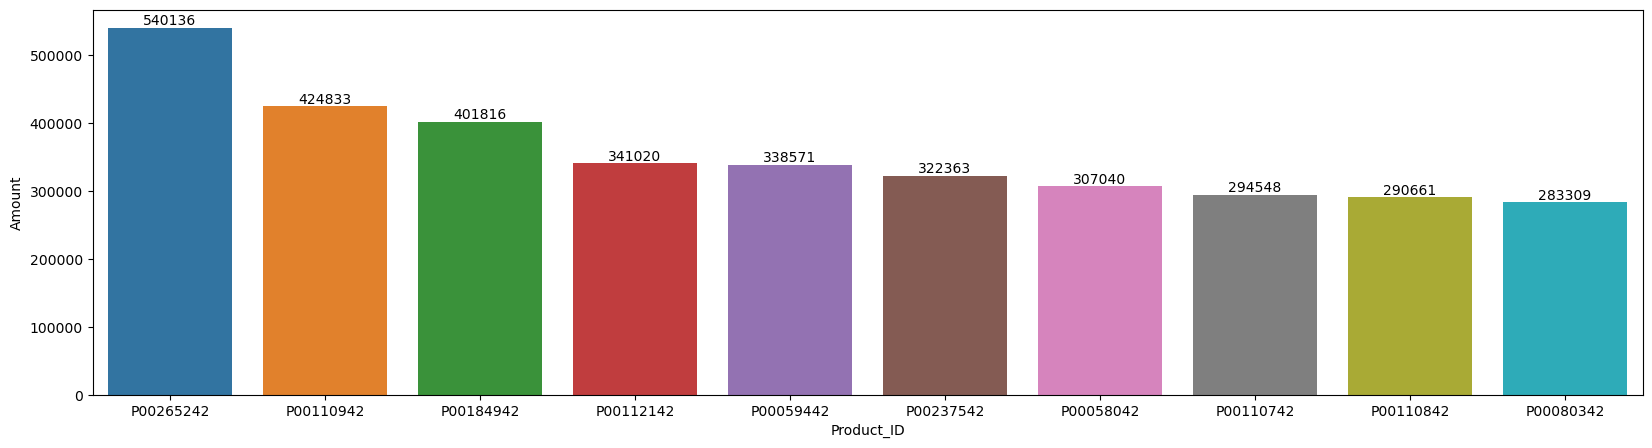

In [234]:
plt.figure(figsize=(20,5))
sale=df.groupby(["Product_ID"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
a=sns.barplot(x="Product_ID",y="Amount",data=sale,hue="Product_ID")
for bars in a.containers:
    a.bar_label(bars)
plt.show()

#         CONCLUSION

Married women age group 26-35 from Uttar Pradesh,Maharashtra and Karnataka working in IT, Aviation and Healthcare sector are more likely to buy products from Food, Cloathing and Electronics category